<a href="https://colab.research.google.com/github/azawel/online-communities/blob/master/Community%2BManagement%2BMeets%2BData%2BScience%2B_%2BLiferay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SUMMARY
As a community builder and strategist with a passion for data science, I have found that the use of  data science techniques has deepened my understanding of the communities I manage, allowing me to make better strategic and operational decisions. In this article, I aim to exemplify how the use of data science can enable community managers to gain insights communities and improve member engagement. 

Liferay, an open source technology company and a client of mine, hosts the [Liferay Community
Forums](https://community.liferay.com/iw/forums). These are very active public forums with over 150,000 registered members and 30,000
members who have actually posted. These forums are mostly Q&A exchanges between developers,
on the topic of Liferay’s technology.  In this article, I analyze the forum members’ activity, posts, and
behavior between 2007 and 2017.  In their open source spirit, Liferay has allowed me to publish this
analysis of their member activity over the past 10 years. 

**Data Privacy Note**: No names or personal details appear here. The original forum postings and member profiles are public, so this is an extra cautionary step.


In [0]:
import csv
import pandas as pd
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline 

## DATA DESCRIPTION

To get started with my data analysis (using Python), I began with a raw file of all of the forum data.
With some data cleaning, I created a file containing the details of every forum message. Each row in
the file is a unique message, containing the following fields:

- **UserId:**  The user who wrote the message
- **CategoryID:**  The forums category where the message appeared, such as “Portal Framework”
- **ThreadId:** The ID for the thread (including the initial post and all replies)
- **Subject** The subject of the message
- **CreateDate:** The day and time of the message 

In [0]:
forums = pd.read_csv('liferay_forums.csv')
forums.tail()

,userId,categoryId,threadId,subject,createDate
372839,54162467,239390,103983539,RE: how to get plugin sdk service jar dependen...,2018-02-15 06:32:08
372840,54162467,239390,103983539,RE: how to get plugin sdk service jar dependen...,2018-02-15 06:53:48
372841,101373208,239390,30882686,RE: Common JSP in all portlet,2018-02-15 07:49:34
372842,57336453,239390,104030805,web content,2018-02-15 07:26:05
372843,2887523,1108052,104031832,knowledge base (KB) portlet and ADT support,2018-02-15 08:22:42


Let's explore the data to learn more about the member journey in the community..

# PART I. THE MEMBER JOURNEY 

## EXPLORING THE DATA WITH FUNCTIONS AND PLOTS: ANALYZING MEMBER LIFESPANS

For communities of developers or clients, understanding the member journey over time can allow the community manager to understand how users evolve and how to best engage them at different stages.

First, let’s take a look at a typical interaction between members in the forums.  

To reproduce the questions and answers of a single discussion thread, I used **forums.loc[forums.threadId==103912609].head(5)** to filter by the “threadId”, which produced the following results:






| userID    | threadID  | subject                           | body                                       |
|-----------|-----------|-----------------------------------|--------------------------------------------|
| 41397961  | 103912609 | service builder, build failed     | I am using liferay 6.2-ce-ga6, jdk...      |
| 103690955 | 103912609 | RE: service builder, build failed | Hi. do you know if maven compiler versi..  |
| 11260116  | 103912609 | RE: service builder, build failed | Hi, Check [url=https://issues.liferay.c... |
| 41397961  | 103912609 | RE: service builder, build failed | I tried but no success.                    |
| 26526     | 103912609 | RE: service builder, build failed | Use JDK 1.7.  Also make sure that JAVA_H.. |

Note: If you run this code, you won't see the "body" column (which was removed from the test data to protect privacy)


In this discussion, it is clear that the user (41397961) is struggling with a technical issue: “service builder, build failed”.  Some helpful members ask for clarification and provide suggestions (in this case, perhaps to no avail).It appears that experienced members are trying to assist the newbies.  Indeed, a central goal of the forums is to help members advance in their journey from novices to experts.

As Jamie Sammons, Developer Advocate at Liferay, Inc. says:

> “Most contributors usually begin within the Liferay community as a consumer reading the documentation, reading the forums and Slack.  For many, the first step to active involvement is to receive help within the forums by asking questions specific to their environments. Most contributors who begin helping others usually start this way and then when they feel they are learning the ropes then sometimes even feel obligated to help others to pay back the support they received."

Another facet in understanding the member journey is identifying the users’ lifespans. Do typical members just post once, or do they remain active over a longer period?  I grouped the posts by user to calculate how long the users remained active, by computing the difference in time between the first and last post. I only included members who started posting before 2015, since the newest members are likely still active.

I used a powerful “groupby” feature in Python to create this data frame:


In [0]:

# To work with the dates efficiently, we need to convert the format of the date field
forums.createDate = pd.to_datetime(forums.createDate)

# Below, I grouped the posts by user. 
# We can calculate the active 'lifespan', by subtrating the max and min dates for each of the user's post
result = forums.groupby('userId')['createDate'].agg(['max','min'])
result['lifespan']=result['max']-result['min']

# I only included members who started posting before 2015, since the newest members are likely still active.
include = result[result['min'].dt.year <= 2015]
include.columns= ['Last Post', 'First Post',"Lifespan"]
include.tail(10)


,Last Post,First Post,Lifespan
userId,,,
65671670,2016-01-18 11:11:44,2015-12-16 16:38:16,32 days 18:33:28
65682762,2015-12-18 16:16:38,2015-12-16 19:42:15,1 days 20:34:23
65736748,2015-12-17 11:11:58,2015-12-17 11:11:58,0 days 00:00:00
66131069,2015-12-22 09:50:35,2015-12-21 13:43:38,0 days 20:06:57
66156794,2015-12-28 08:35:25,2015-12-21 19:51:26,6 days 12:43:59
66202657,2015-12-22 08:20:24,2015-12-22 08:20:24,0 days 00:00:00
66225381,2015-12-22 12:41:18,2015-12-22 12:41:18,0 days 00:00:00
66670388,2015-12-28 09:33:33,2015-12-28 09:33:33,0 days 00:00:00
66827125,2015-12-30 13:31:44,2015-12-30 13:31:44,0 days 00:00:00


The community manager can look up the lifespan of any individual member, but it’s also interesting to look at the frequency distribution of all members’ lifespans. How many users had a lifespan of 1 day, compared to users with a much longer lifespan? This is where visualizations are helpful. The plot below demonstrates that almost 800 members had a life span of 1 day, with a large drop off in frequency thereafter. 


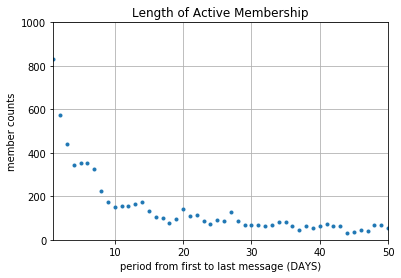

In [0]:
# Just consider days (not hours, minutes, seconds)
lifespan_days = result['lifespan'].dt.days
# Now we can count up the number of members who only had a lifespan of 0,1,2... days
freq = lifespan_days.value_counts()
# The plot shows the members whose lifespan is between 1 and 50 days
plt.plot(freq,'.');
plt.axis([1, 50, 0, 1000]);
plt.xlabel('period from first to last message (DAYS)')
plt.ylabel('member counts')
plt.title('Length of Active Membership')
plt.grid(True)

plt.show()

What’s NOT shown in the plot above is the 13,118 members – 42% of the total members who posted – who have a lifespan of 0 days! (I set the Y access to 1,000 max, so the 12,000 member data point is not shown). A lifespan of 0 days means that there first and last message were on the same day; it is possible that these members simply posted one message and never came back to the forums.



In [0]:
freq.head(5)

0    13118
1      833
2      574
3      441
6      355
Name: lifespan, dtype: int64

## LEVERAGING THE DATA: COMMUNTY MANAGER IMPLICATIONS 

With this data in hand, community managers can achieve a strategic dual objective: increase the lifespan of members, and minimize the amount of members who have a lifespan of 0 days. Community managers could initiate a special outreach campaign after a member writes 1 post, and send personalized messages to new members, encouraging continuing engagement. Perhaps they could even award new members points in a “gamification” system.

## VISUALIZING THE DATA: UNDERSTANDING THE LIFESPANS OF VETERAN COMMUNITY MEMBERS

I was also interested in understanding the typical lifespans of veteran members. Therefore, I changed the scale on the graph above from days to years, in order to zero in on veterans and their lifespans in the community. 


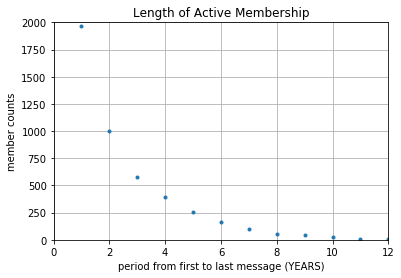

In [0]:
lifespan_years = lifespan_days//365
freqyear = lifespan_years.value_counts()
plt.plot(freqyear,'.');
plt.axis([0, 12, 0,2000]);
plt.xlabel('period from first to last message (YEARS)')
plt.ylabel('member counts')
plt.title('Length of Active Membership')
plt.grid(True)

plt.show()

This chart shows that 1800 members had forum lifespans of 1-2 years. The drops from year 1 to 2 and 2 to 3 are dramatic.  The bottoming out after 2 or 4 years is not surprising, as developers often have Liferay projects that last 2-4 years, after which they move on to other projects or companies.

As Jamie Sammons, Developer Advocate at Liferay, Inc. says:
>“Most of the time what happens is the developer works for a consulting company and moves on to a new project or the developer may change jobs altogether.  In a few cases the developer works for a SI or partner company and they simply have a massive workload due to good business and simply cannot find time to contribute.”

## UTILIZING THE INSIGHT GAINED FROM THE DATA: COMMUNTY MANAGEMENT IMPLICATIONS
 
When a formerly active member goes quiet after being active for 2+ years, he can get special personal outreach, for example:  “What happened? Can we help with your next project?” In addition, these members could be invited to higher level discussions (e.g., the future roadmap of the project or company) rather than code Q&A conversations.

## OTHER BEHAVIORAL ANALYSIS TOPICS 

There is much more insight that can be gleaned using member login information. For example, an analysis can be done on the 90% of registrants who never posted at all, based on their login time stamps. These quiet “lurkers” who log in regularly can then be separated from the truly inactive, and their behavior analyzed to encourage higher levels of engagement. Other interesting information can be gleaned by combining the forum records with other sources of data (e.g., Jira, or CRM), enabling a 360 degree view of the forum members’ relevant activities across platforms. It may also be insightful to analyze popular posting times in the community, so that the marketing and communications team can identify the best times to post in the forums. (Keep in mind that international communities and time zones can make this analysis tricky.) Finally, it might be interesting to understand the impact of initiatives. For example, did member activity increase after the release of a new version of the software? 

Analysis of community members’ activity on the forums can help improve the customer journey and member engagement. The next level of insight can be obtained by analyzing the actual content of the forum’s posts.

# PART 2. USING NATURAL LANGUAGE PROCESSING (NLP) TO UNDERSTAND THE COMMUNITY



## WORD COUNTS AND TRIGRAMS – IDENTIFYING THE MAIN TOPICS GENERATING DISCUSSION

What is the entire community talking about, and how are members interacting? With a few steps, we can make a chart that contains the word counts from the subject lines of every discussion in two Liferay forum categories (“Announcements” and “Development”).  

To look at the subject lines of a single cateogry, I use masking and fancy indexing to get a clean dataframe of a single category:

Next, I combine (chunk) all of the text from the subject lines of all posts in this category.  
I exclude messages if they include "RE:" because these are duplicative (responses to the oringial post) 

In [0]:
development = forums.loc[forums.categoryId == 239390]


Next, I combine (chunk) and tokenize all of the text from the subject lines of all posts in this category.
I exclude messages if they include "RE:" because these are duplicative (responses to the oringial post).

In [0]:
chunks = []
for s in development.subject:
    if "RE:" not in s:
        chunks.append(s)
result = ' '.join(chunks)

#tokenize the words
tokens = nltk.word_tokenize(result)
words = [w.lower() for w in tokens]
toplist = set(('the', 'with', 'and',"for",'not','from','can','get','using','add','use','when','new','after','working','change','adding','action','does','getting','a','.','\\','(',')','\'','on', ':','in','-','of','to','is'))



Now, we can create a list of the most common words in the "development" forum category


In [0]:
devWords = [word for word in words if word not in stoplist]
fdist_dev = nltk.FreqDist(devWords)
dev_common = fdist_dev.most_common(10)

Below, I repeat the same steps with the Announcements category: https://community.liferay.com/forums/-/message_boards/category/338866


In [0]:
announcements = forums.loc[forums.categoryId == 338866]

chunks2 = []
for s in announcements.subject:
    if "RE:" not in s:
        chunks2.append(s)
result2 = ' '.join(chunks2)

#tokenized words from the subject lines
tokens2 = nltk.word_tokenize(result2)
words2 = [w.lower() for w in tokens2]

announceWords = [word for word in words2 if word not in stoplist]
fdist_announce = nltk.FreqDist(announceWords)
announce_common = fdist_announce.most_common(10)

Finally, we can see the word counts we can make a chart that contains  the word counts from the subject lines of 
every discussion in two Liferay forum categories (“Announcements” and “Development”).

In [0]:
  dfWord = pd.DataFrame(
    {'Development': dev_common,
     'Announcements': announce_common
    })
dfWord.index += 1 
dfWord

,Announcements,Development
1,"(liferay, 126)","(liferay, 7595)"
2,"(!, 39)","(portlet, 6826)"
3,"(released, 15)","(how, 4790)"
4,"(development, 15)","(?, 4562)"
5,"(openxava, 14)","(custom, 1982)"
6,"(community, 13)","(page, 1888)"
7,"(symposium, 13)","(user, 1766)"
8,"(rapid, 13)","(problem, 1282)"
9,"(available, 11)","(service, 1239)"
10,"(release, 11)","(error, 1224)"


The “?" and word "how" that appear in the Development category are typical for this community, where the primary use case is members asking other members technical or product-related questions.   This “Q & A” content structure can be confirmed by looking at the most common trigrams (3 word combinations) below.   

Development Category Trigrams:


In [0]:

tgs = nltk.trigrams(words)
fdistT = nltk.FreqDist(tgs)
fdistT.most_common(5)

[(('how', 'to', 'get'), 488),
 (('?', 'how', 'to'), 435),
 (('how', 'to', 'use'), 266),
 (('[', 'solved', ']'), 254),
 (('how', 'to', 'add'), 253)]

The “!” in the Announcement category is more common for professional communities that are celebrating successes (e.g., “Congrats on the sale!).  In the case of the Liferay forums, the dialogue resembles a typical “information dissemination” community (with keywords such as “released” and “available”). 

NOTES ABOUT THE DATA AND NLP ANALYSIS

- For this type of analysis, make sure characters such as "?” and “!” are not included on stopper lists 
- The announcement category is much smaller than the development category, and thus the word counts are much lower (but the relative ranking is what is most important).



## WORD CLOUDS – UNDERSTANDING TOPICS OF CONVERSATION 

The wordcloud below is another way to show the keywords in a category.  In the stoplist here, I removed a few words that were common to this corpus, such as "Liferay".

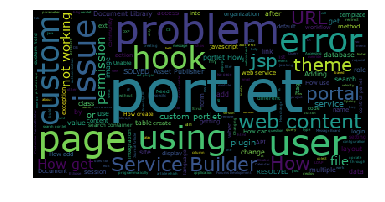

In [0]:


from wordcloud import WordCloud
text = result

def generate_wordcloud(text): 
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 0.5,
                          stopwords = {'to', 'of','for','the','is','Liferay','in','and','on','from','with'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(text)


We could also create a Word Cloud for a single user over time. We would just need to reproduce the steps above (Chunk, Tokenize, etc, for a single user).

We could call this a "Member Profile Word Cloud." and the data that comprises the word cloud can be used to radically improve the member’s experience in the community.  For example, posts on the topics identified through the word cloud can appear in the member’s activity feed, making the feed more relevant and engaging.

## KEYWORD ANALYSIS - HOW NLP CAN ENABLE GREATER EFFICIENCY IN COMMUNITY MANAGEMENT

NLP can also help with routine, but essential, community management tasks.  For example, a common challenge in technical forums is getting good answers to all of the questions asked by community members (thus fostering trust and engagement with the community.) 

A typical approach used by Liferay is to assign experts to cover each forum category. However, in Liferay’s case, nearly 40% of the Liferay messages fall in one category, “development”, and it is impractical to assign experts to cover this entire catch-all category. To tackle this issue, we can look for key themes to some of the discussions in this category that can be isolated to form smaller, more manageable discussion categories.  Keyword analysis is very helpful here, but in this case, characters and short words aren’t helpful, so I filtered for longer words:

In [0]:
long_words = [word for word in words if
              len(word) > 2 and word not in stoplist]
fdistLong = nltk.FreqDist(long_words)
fdistLong.most_common(50)

[('liferay', 7595),
 ('portlet', 6826),
 ('how', 4790),
 ('custom', 1982),
 ('page', 1888),
 ('user', 1766),
 ('problem', 1282),
 ('service', 1239),
 ('error', 1224),
 ('web', 1180),
 ('content', 1099),
 ('portlets', 978),
 ('search', 951),
 ('file', 920),
 ('url', 787),
 ('hook', 774),
 ('issue', 772),
 ('create', 756),
 ('jsp', 730),
 ('document', 719),
 ('login', 708),
 ('portal', 699),
 ('6.2', 669),
 ('display', 643),
 ('plugin', 606),
 ('data', 602),
 ('builder', 591),
 ('theme', 573),
 ('database', 549),
 ('template', 544),
 ('ext', 521),
 ('workflow', 496),
 ('users', 489),
 ('access', 479),
 ('asset', 476),
 ('6.1', 471),
 ('pages', 461),
 ('class', 458),
 ('site', 458),
 ('library', 456),
 ('development', 455),
 ('image', 441),
 ('session', 423),
 ('spring', 406),
 ('default', 400),
 ("n't", 398),
 ('struts', 394),
 ('form', 393),
 ('multiple', 392),
 ('creating', 388)]

It is clear that there are some good candidates here for topics that can be separated out from the crowded "Development" category:

- Portlet 
- JSP 
- Builder
- Theme 
- Database

Bigrams (2 word combinations) reveal other good potential topics, including “service builder”, “custom portlet”, and “document library.”
   
It is also helpful to understand popular topics and how they trend over time. For example, in the trigram analysis above, the community talked intensely about “6.1” (presumably, a version of Liferay) as it was coming out – and then the discussions quieted down.  There was also an overlap of discussion around “6.1” and “6.2” as “6.2” was released. The code and dispersion plot for “6.1” and “6.2” appear below.





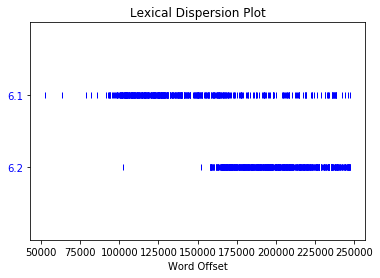

In [0]:
mytext = nltk.Text(words) 
plt.grid(False)

mytext.dispersion_plot(["6.1","6.2"])

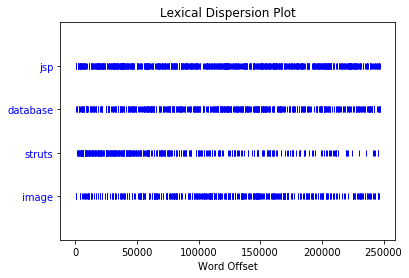

In [0]:
# Here is an analysis of some other topics in the top 50 list:
mytext.dispersion_plot(["jsp","database","struts","image"])


“Struts” were a hot topic early on, and then the topic died out. “JSP” and “database” were discussed extensively throughout.  It seems uncertain if “image” is a good candidate for its own category. To get a greater understanding of whether “image” is indeed an important word, one option is to run mytext.concordance(“image”) to show a sample of how “image” was used in the context of the message, before deciding if “images” would be a useful forum category. 

The above functions and visualizations are just the tip of the iceberg; there is much more that can be discovered by analyzing user behavior and analysis of the content. Alas, meaningful analysis with the latest AI tools, especially for “unstructured” analysis (where the system doesn’t know up-front what it’s looking for) requires a lot of data. Even so, relatively basic, yet thoughtful analysis of small data sets can significantly improve community management.  Understanding the members’ behavior and their content can augment community managers’ ability to effectively serve their communities, increasing their communities’ relevance and by extension, engagement, membership, and impact. 